## Using the distance matricies I created in [the distance API notebook](http://localhost:8888/notebooks/Desktop/CapstoneMSGT/Notebooks/TestinBingAPI.ipynb) to try MDS

This one is for Congressional District 9, using 0.01 degree intervals for the mesh.

In [46]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from decimal import Decimal

#queue up the distance matrix from the distance API notebook.
dmatrix = pd.read_pickle('Shapes/09/CD09_01dmx.pkl')
dmatrix2 = dmatrix.astype(float)

#create a list of points from the df header to plot
geopoints = list(dmatrix)

#plot the points from the dmatrix headings
lat = []
long = []
for point in geopoints:
    long.append(point[0])
    lat.append(point[1])
    
#compare to the shapefile (can never be too careful...)
'''fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(geopoints)))
ax1.scatter(lat,long, c = colors)
ax1.set_title('dmatrix')
ax1.set_ylabel('Lat')
ax1.set_xlabel('Long')

pts = 'Shapes/09/CD09_01pts.shp'
CD_grid = gpd.read_file(pts)
CD_grid.plot(ax=ax2)
ax2.set_title('CD09_01pts.shp')

img = plt.imread('Shapes/09/CD09_01.png')
ax3.imshow(img)
ax3.set_title('For context...')
ax3.set_yticklabels([])
ax3.set_xticklabels([])'''



"fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))\nplt.style.use(['bmh'])\n\ncolors = matplotlib.cm.rainbow(np.linspace(0, 1, len(geopoints)))\nax1.scatter(lat,long, c = colors)\nax1.set_title('dmatrix')\nax1.set_ylabel('Lat')\nax1.set_xlabel('Long')\n\npts = 'Shapes/09/CD09_01pts.shp'\nCD_grid = gpd.read_file(pts)\nCD_grid.plot(ax=ax2)\nax2.set_title('CD09_01pts.shp')\n\nimg = plt.imread('Shapes/09/CD09_01.png')\nax3.imshow(img)\nax3.set_title('For context...')\nax3.set_yticklabels([])\nax3.set_xticklabels([])"

In [47]:
from sklearn import manifold
import numpy as np
from sklearn.metrics import pairwise_distances

#need to remove a NaN at the intersection of the final row/column
dmatrix2.fillna(0, inplace = True)  

#taking a look to see if anything else changed since we saved the distance matrix in the Bing API notebook:
print('')


In [48]:
# pass the travel time matrix to a pairwise_distance function per https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
D = pairwise_distances(dmatrix2)

# pass the pairwise_distance array back to pandas dataframe for a better visualization.
edm = pd.DataFrame(D)  #edm = euclidean distance matrix

#The main problem here is that I have no idea how it is arriving at these pairwise distance values. The point geometry is stored as a tuple in the dataframe index and header (firts row/column).
#However, after passing the distance matrix to the pairwise_distances function, the header and index are re-assigned intiger values. 

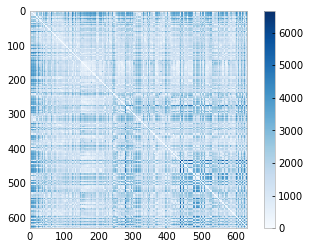

In [50]:
#visualizing the travel time/distance matrix array:
plt.imshow(dmatrix2, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

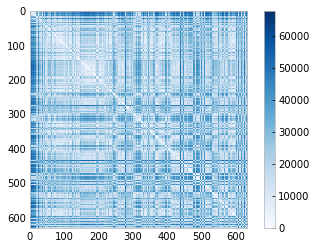

In [49]:
#visualizing the pairwise_distance array:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();


In [51]:
ttm = dmatrix2 #make a copy so I don't accidentally break stuff.

#run the MDS modeling on the original ttm (time travel matrix)
model = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(ttm)


[]

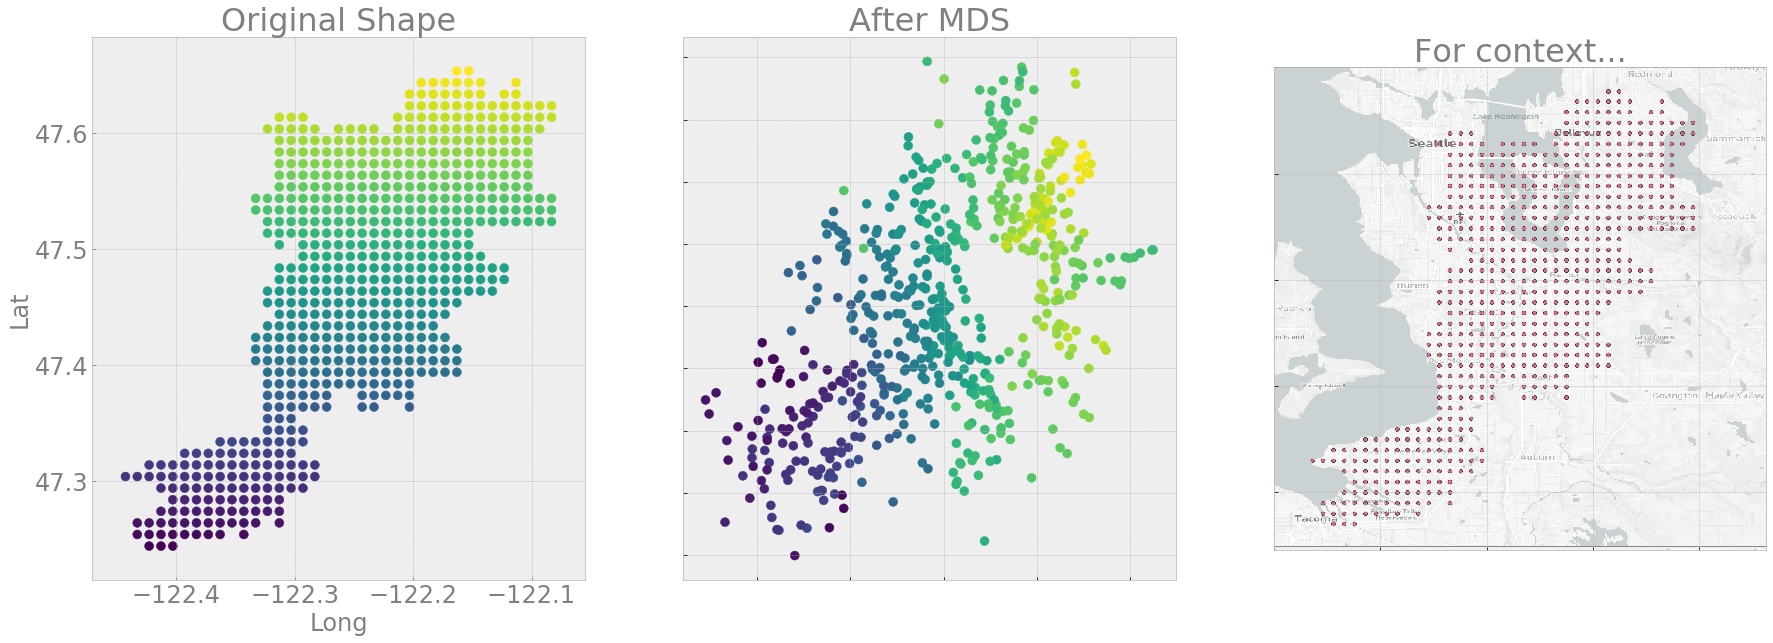

In [52]:
#lets compare the MDS results to our original
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

ax1.scatter(lat,long, s = 80, c =long, cmap=plt.cm.viridis)
ax1.set_title('Original Shape', color='gray', fontsize=32)
ax1.set_ylabel('Lat', color='gray', fontsize=24)
ax1.set_xlabel('Long', color='gray', fontsize=24)
ax1.tick_params(colors='gray', labelsize=24)

ax2.scatter(out[:, 0], out[:, 1],s = 80, c =long, cmap=plt.cm.viridis)   
ax2.set_title('After MDS', color='gray', size=32)
ax2.set_yticklabels([])
ax2.set_xticklabels([])

img = plt.imread('Shapes/09/CD09_01.png')
ax3.imshow(img)
ax3.set_title('For context...', color='gray', size=32)
ax3.set_yticklabels([])
ax3.set_xticklabels([])



In [38]:
#run the MDS modeling on the EDM (euclidean distance matrix) dataframe. Not sure which one is meaningful, but I am leaning towards the first (with values based on travel time, not similarity).
model = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out2 = model.fit_transform(edm)

[]

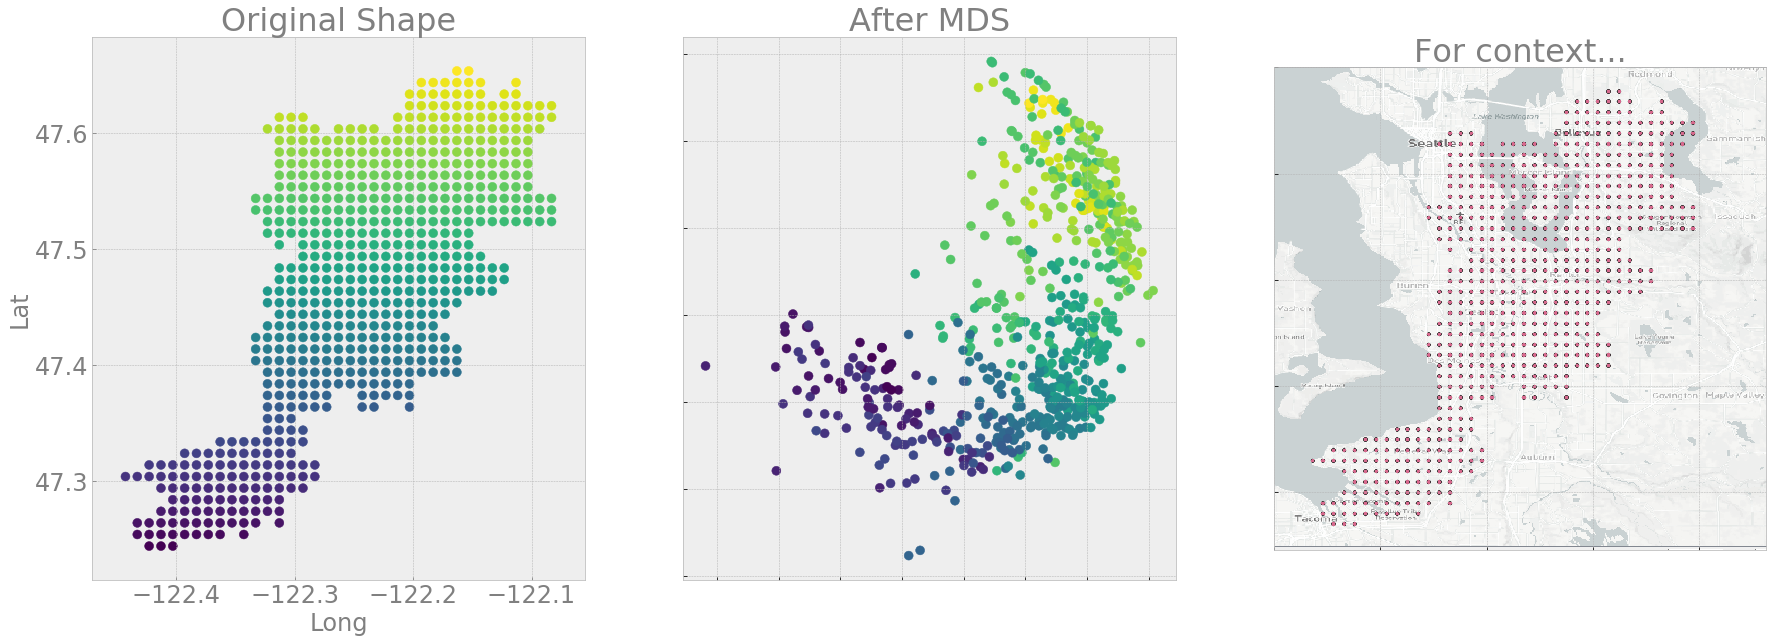

In [53]:
#lets compare the MDS results to our original
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

ax1.scatter(lat,long, s = 80, c =long, cmap=plt.cm.viridis)
ax1.set_title('Original Shape', color='gray', fontsize=32)
ax1.set_ylabel('Lat', color='gray', fontsize=24)
ax1.set_xlabel('Long', color='gray', fontsize=24)
ax1.tick_params(colors='gray', labelsize=24)

ax2.scatter(out2[:, 0], out2[:, 1],s = 80, c =long, cmap=plt.cm.viridis)   
ax2.set_title('After MDS', color='gray', size=32)
ax2.set_yticklabels([])
ax2.set_xticklabels([])

img = plt.imread('Shapes/09/CD09_01.png')
ax3.imshow(img)
ax3.set_title('For context...', color='gray', size=32)
ax3.set_yticklabels([])
ax3.set_xticklabels([])

In [54]:
dmatrix2.equals(dmatrix2.T)

True